# 1. Introduction

In this chapter, we will introduce the problem of offline reinforcement learning (RL). To do so, we will first introduce the problem of RL and off-policy methods to extend to the offline RL setting. We will provide toy examples of off-policy methods to understand RL, but if you are already familiar with conventional RL, you can skip this section. As we address off-policy methods, we will discuss challenges of applying off-policy methods to the offline RL setting. Finally, we will summarize the chapter.

> We don't provide offline RL algorithms in this chapter, but focus on what offline RL is. If you're interested in only offline RL algorithms, please refer to the next chapter.

Table of Contents:

* [1.1. Reinforcement Learning](#11-reinforcement-learning)
* [1.2. What is Offline RL?](#12-what-is-offline-rl)
* [1.3. Off-policy Methods](#13-off-policy-methods)
* [1.4. Summary](#14-summary)
* [1.5. References](#15-references)

## 1.1. Reinforcement Learning

Reinforcement learning (RL) is a machine learning paradigm that **learns a policy from interaction with an environment**. In other words, RL addresses the sequential decision making problems defined by a *Markov decision process* (MDP). MDP is defined by a tuple $\mathcal{M} = (\mathcal{S}, \mathcal{A}, T, d_0, r, \gamma)$, where:

* $\mathcal{S}$ is a set of states $\mathbf{s} \in \mathcal{S}$,
* $\mathcal{A}$ is a set of actions $\mathbf{a} \in \mathcal{A}$,
* $T$ is a transition probability function or dynamics $T(\mathbf{s}_{t+1} \vert \mathbf{s}_t, \mathbf{a}_t)$,
* $d_0$ is the initial state distribution $d_0(\mathbf{s}_0)$,
* $r$ is a reward function $r : \mathcal{S} \times \mathcal{A} \rightarrow \mathbb{R}$,
* $\gamma$ is a scalar discount factor $\gamma \in (0, 1]$.

Specifically, the agent interacts with the environment by taking an action $\mathbf{a}_t$ in a state $\mathbf{s}_t$ and receiving a reward $r(\mathbf{s}_t, \mathbf{a}_t)$ and a next state $\mathbf{s}_{t+1}$ according to the transition probability function $T(\mathbf{s}_{t+1} \vert \mathbf{s}_t, \mathbf{a}_t)$.

![](img/fig1_1.png)

Figure 1.1: Markov Decision Process (MDP).

The goal of RL is to find a *policy* $\pi(\mathbf{a_t} \vert \mathbf{s_t})$ that maximizes the cumulative rewards. From the policy, we can derive the trajectory distribution. The *trajectory* is a sequence of state and actions of length $H$, given by $\tau = (\mathbf{s}_0, \mathbf{a}_0, \dots, \mathbf{s}_H, \mathbf{a}_H)$ where $H$ may be infinite. The *trajectory distribution* $p_\pi$ for a given MDP $\mathcal{M}$ and policy $\pi$ is defined by:

$$
p_\pi(\tau) = d_0(\mathbf{s}_0) \prod_{t=0}^{H} \pi(\mathbf{a}_t \vert \mathbf{s}_t) T(\mathbf{s}_{t+1} \vert \mathbf{s}_t, \mathbf{a}_t).
$$

The RL objective $J(\pi)$ can then be written as the expected return or expected cumulative rewards under this trajectory distribution:

$$
J(\pi) = \mathbb{E}_{\tau \sim p_\pi} \left[ \sum_{t=0}^{H} \gamma^t r(\mathbf{s}_t, \mathbf{a}_t) \right]. \tag{1}
$$

We will use $d^\pi(\mathbb{s})$ to refer to the overall state visitation frequency, averaged over the time steps, and $d_t^\pi(\mathbb{s})$ to refer to the state visitation frequency at time step $t$.

## 1.2. What is Offline RL?

Reinforcement learning algorithms provide a fundamentally online learning paradigm. It's because the agent interacts with the environment to collect data and improve the policy. However, in many real-world applications, it is expensive or even dangerous to collect data from the environment. For example, in robotics, it is expensive to collect data from the real robot. In healthcare, it is dangerous to collect data from the real patient. In these cases, we need to learn a policy from **a fixed dataset of trajectories collected from a fixed policy**. This is called offline RL.

In offline RL, we assume that we have a fixed dataset $\mathcal{D}$ of trajectories $\tau$ collected from a fixed policy $\pi_\beta$. The goal of offline RL is to learn a policy $\pi$ that maximizes the RL objective (1) using the dataset $\mathcal{D}$ **without further interaction with the environment**. In other words, offline RL aims to learn a policy that performs well in the environment without further interaction with the environment. This is in contrast to online RL, where the agent interacts with the environment to collect data and improve the policy. Offline RL is also known as data-driven RL that utilizes only previously collected offline data.

![](img/fig1_2.png)

Figure 1.2: Pictorial illustration of online RL (a), off-policy RL (b), and offline RL (c).

## 1.3. Off-policy Methods

In this section, we will introduce off-policy methods, which are the basis of offline RL. Off-policy methods **learn a policy from a dataset collected from a different policy**. Therefore any off-policy methods could be used as an offline RL algorithm in principle. But, off-policy methods still require interaction with the environment to collect data. In other words, **off-policy methods are still online learning methods**.

We will cover the following algorithms:

1. Off-policy Monte Carlo in tabular setting
2. Off-policy Policy Gradient

and then discuss the challenges. If you are already familiar with these algorithms, you can skip this section.

### 1.3.1. Off-policy Monte Carlo

Off-policy *Monte Carlo* (MC) is a model-free off-policy RL algorithm. It learns a policy from a dataset collected from a different policy. In other words, it learns a policy from a dataset collected from a *behavior policy* $\pi_\beta$ and improves a *target policy* $\pi$. The behavior policy $\pi_\beta$ is usually a stochastic policy that **explores the environment**, and the target policy $\pi$ is a deterministic policy that **exploits the environment**. The behavior policy $\pi_\beta$ is usually an $\epsilon$-greedy policy, which selects a random action with probability $\epsilon$ and selects the action that maximizes the action-value function with probability $1 - \epsilon$. The target policy $\pi$ is a greedy policy, which selects the action that maximizes the action-value function.

But, there is a problem with off-policy methods. Since **a distribution of the behavior policy is different from the target policy one**, the off-policy methods are biased. To address this problem, we use importance sampling. *Importance sampling* is a technique to estimate the expectation of a target distribution using samples from a different distribution. In off-policy MC, we use importance sampling to estimate the expectation of the target policy $\pi$ using samples from the behavior policy $\pi_\beta$. Given a starting state $S_t$ and the **subsequent** state-action trajectory:

$$
\mathbf{a}_t, \mathbf{s}_{t+1}, \mathbf{a}_{t+1} \dots, \mathbf{s}_H, \mathbf{a}_H
$$

then, the importance sampling ratio $\rho$ of the trajectory is defined by:

$$
\rho_{t:H} = \prod_{k=t}^{H} \frac{\pi(\mathbf{a}_k \vert \mathbf{s}_k)}{\pi_\beta(\mathbf{a}_k \vert \mathbf{s}_k)}.
$$

Now, we can estimate the expected return under the target policy $\pi$, that is state value $V^\pi$, using samples from the behavior policy $\pi_\beta$:

$$
V^\pi(\mathbf{s}) = \mathbb{E} [\rho_{t:H} R_t \vert \mathbf{s}_t = \mathbf{s}]. \tag{2}
$$

where, $R_t = \sum_{k=t}^{H} \gamma^{k-t} r(\mathbf{s}_k, \mathbf{a}_k)$ is the return from time step $t$. Similarly, we can estimate action value $Q^\pi$ using samples from the behavior policy:

$$
Q^\pi(\mathbf{s}, \mathbf{a}) = \mathbb{E} [\rho_{t+1:H} R_t \vert \mathbf{s}_t = \mathbf{s}, \mathbf{a}_t = \mathbf{a}]. \tag{3}
$$

when estimating action value function, we use $\rho_{t+1:H}$, not ${\rho_{t:H}}$, since the subsequent state-action trajectory is $\mathbf{s}_{t+1}, \mathbf{a}_{t+1}, \mathbf{s}_{t+2}, \mathbf{a}_{t+2} \dots, \mathbf{s}_H, \mathbf{a}_H$.

The algorithm below shows off-policy MC control. This algorithm is from Sutton and Barto (2018), but we modified it to use ordinary importance sampling instead of weighted importance sampling to simplify the idea:

![](img/fig1_3.png)

Figure 1.3: Off-policy MC control algorithm.

### 1.3.2. Implementation of Off-policy MC Control

Now, let's implement off-policy Monte Carlo in tabular setting. We use the [Frozen Lake](https://gymnasium.farama.org/environments/toy_text/frozen_lake/) environment from OpenAI Gym. Let's see the environment. First, make it:

In [1]:
import gymnasium as gym

# make the environment
env_id = "FrozenLake-v1"
env = gym.make(env_id, render_mode="rgb_array")
_ = env.reset()

Environment image:

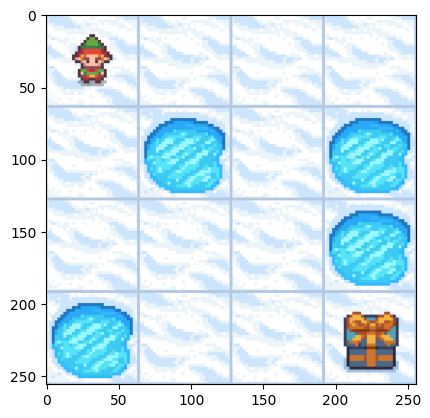

In [2]:
import matplotlib.pyplot as plt

plt.imshow(env.render())
plt.show()

State space and action space of the environment:

In [3]:
print(f"State space: {env.observation_space}")
print(f"Action space: {env.action_space}")

State space: Discrete(16)
Action space: Discrete(4)


The state space is `Discrete(16)` which represents the index of $4 \times 4$ grid.

Finally, close the environment:

In [4]:
env.close()

Now, we will train off-policy Monte Carlo in tabular setting. First, we will implement the behavior policy $\pi_\beta$. The behavior policy $\pi_\beta$ is an $\epsilon$-greedy policy, which selects a random action with probability $\epsilon$ and selects the action that maximizes the action-value function with probability $1 - \epsilon$:

$$
\pi(a \vert s) = \begin{cases} 1 - \epsilon + \dfrac{\epsilon}{\vert \mathcal{A}(s) \vert} & \text{if } a = \text{greedy} \\ \dfrac{\epsilon}{\vert \mathcal{A}(s) \vert} \qquad & \text{if } a = \text{nongreedy} \end{cases}
$$

Implement `epsilon_greedy()` function which selects an action from action values and `epsilon_greedy_dist()` function which returns a distribution of the $\epsilon$-greedy policy:

```python

In [5]:
import numpy as np

def epsilon_greedy(q_values: np.ndarray, eps: float = 0.1) -> int:
    """
    Selects an action from `q_values` using epsilon-greedy policy. If `eps` is `0.0`, this becomes a greedy policy.
    """
    if np.random.random() < eps:
        return np.random.randint(len(q_values))
    else:
        return np.argmax(q_values)
    
def epsilon_greedy_dist(q_values: np.ndarray, eps: float = 0.1) -> np.ndarray:
    """
    Returns the probability distribution of epsilon-greedy policy.
    """
    probs = np.ones(len(q_values)) * eps / len(q_values)
    probs[np.argmax(q_values)] += 1.0 - eps
    return probs

We will implement `generate_episode()` function to generate an episode using the behavior policy $\pi_\beta$. `Q` is a table of action values of all state-action pairs. This function returns experiences of the episode, which is a list of experience tuples `(state, action, reward)`:

In [6]:
import gymnasium as gym

def generate_episode(env: gym.Env, Q: np.ndarray, eps: float = 0.1) -> list[tuple[int, int, float]]:
    experiences = []
    
    state, _ = env.reset()
    terminated = False
    
    while not terminated:
        # take action and observe
        action = epsilon_greedy(Q[state], eps=eps)
        next_state, reward, terminated, truncated, _ = env.step(action)
        
        # store experience tuple (s, a, r)
        experiences.append((state, action, reward))
        
        # update
        state = next_state
        terminated = terminated or truncated
    
    return experiences

Now, it's time to train the agent. Initialize:

In [7]:
from collections import defaultdict

env = gym.make(env_id)

n_states = env.observation_space.n
n_actions = env.action_space.n

Q = np.random.randn(n_states, n_actions) # Q-value table, random initialization is better than zero initialization
weighted_returns = defaultdict(list) # all returns multiplied by importance sampling ratio

gamma = 0.99

episodes = 10000
summary_freq = episodes // 20
cumulative_rewards = []

Start training:

In [8]:
from tqdm.notebook import tqdm

for episode in tqdm(range(1, episodes + 1)):
    experiences = generate_episode(env, Q)
    H = len(experiences) # episode length
    R = 0.0 # return
    rho = 1.0 # importance sampling ratio
    
    for t in reversed(range(H)):
        state, action, reward = experiences[t]
        
        # update return
        R = gamma * R + reward
        # update Q-value
        weighted_returns[(state, action)].append(rho * R)
        Q[state, action] = np.mean(weighted_returns[(state, action)])
        
        target_action = epsilon_greedy(Q[state], eps=0.0) # target policy is greedy
        # if the action is not the target action, then the probability is 0,
        # so we can break the loop here
        if action != target_action:
            break
        
        target_action_prob = 1.0
        behavior_action_prob = epsilon_greedy_dist(Q[state])[action]
        rho *= target_action_prob / behavior_action_prob
        
    _, _, rewards = zip(*experiences)
    cumulative_rewards.append(sum(rewards))
        
env.close()

  0%|          | 0/10000 [00:00<?, ?it/s]

Plot moving average of the cumulative rewards:

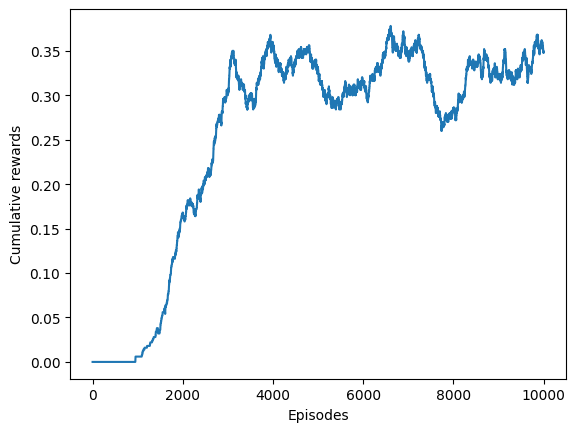

In [9]:
from src.util import moving_average

plt.plot(moving_average(np.array(cumulative_rewards), smooth=0.05))
plt.xlabel("Episodes")
plt.ylabel("Cumulative rewards")
plt.show()

### 1.3.3. Off-policy Policy Gradient

We will extend off-policy MC to off-policy policy gradient. *Policy gradien*t is one of the most direct ways to optimize the RL objective in Equation 1 by directly estimating its gradient. In this case, we typically assume that **the policy is parameterized** by $\theta$, and therefore given by $\pi_\theta$. Then, the gradient of the objective with respect to $\theta$ as:

$$
\nabla_\theta J(\pi_\theta) = \mathbb{E}_{\tau \sim p_{\pi_{\theta}(\tau)}} \left[ \sum_{t=0}^{H} \gamma^t \nabla_\theta \log \pi_\theta(\mathbf{a}_t \vert \mathbf{s}_t) \hat{A}(\mathbf{s}_t,\mathbf{a}_t) \right]. \tag{4}
$$

where the return estimator $\hat{A}$ can be $\sum_{t'=t}^H \gamma^{t'-t} r(\mathbf{s}_{t'}, \mathbf{a}_{t'}) - b(\mathbf{s}_t)$ or itself learned as a separate neural network *critic*.

Policy gradient methods are typically on-policy methods, which means that they learn a policy from data collected from the same policy. However, we can extend policy gradient methods to off-policy methods. The most direct way is to **employ importance sampling** to estimate the gradient of the objective with respect to $\theta$ using samples from the behavior policy $\pi_\beta$:

$$
\begin{align*}
\nabla_\theta J(\pi_\theta) &= \mathbb{E}_{\tau \sim \pi_{\beta}(\tau)} \left[ \frac{\pi_\theta(\tau)}{\pi_\beta(\tau)} \sum_{t=0}^{H} \gamma^t \nabla_\theta \log \pi_\theta(\mathbf{a}_t \vert \mathbf{s}_t) \hat{A}(\mathbf{s}_t,\mathbf{a}_t) \right] \\
&= \mathbb{E}_{\tau \sim \pi_{\beta}(\tau)} \left[ \left( \prod_{t=0}^H\frac{\pi_\theta(\mathbf{a}_t \vert \mathbf{s}_t)}{\pi_\beta(\mathbf{a}_t \vert \mathbf{s}_t)} \right) \sum_{t=0}^{H} \gamma^t \nabla_\theta \log \pi_\theta(\mathbf{a}_t \vert \mathbf{s}_t) \hat{A}(\mathbf{s}_t,\mathbf{a}_t) \right].
\end{align*}
$$

But, importance sampling is known to have **very high variance** since it requires multiplication of importance weights over multiple time steps. To address this problem, we use an approximate importance-sampled gradient by using the state distribution of the behavior policy $d^{\pi_\beta(\mathbf{s})}$. This results in a biased gradient, but can provide reasonable performance in practice. The objective is defined by:

$$
J_{\pi_\beta}(\pi_\theta) = \mathbb{E}_{\mathbf{s} \sim d^{\pi_\beta}(\mathbf{s})}[V^\pi(\mathbf{s})]
$$

Note that $J_{\pi_\beta}(\pi_\theta)$ and $J(\pi_\theta)$ are different. Now we can remove the importance sampling. It's approximate off-policy policy gradient:

$$
\nabla_\theta J_{\pi_\beta}(\pi_\theta) \approx \mathbf{g}(\pi_\theta) = \mathbb{E}_{\mathbf{s} \sim d^{\pi_\beta}(\mathbf{s}), \mathbf{a} \sim \pi_\theta(\mathbf{a} \vert \mathbf{s})} \left[ Q^{\pi_\theta}(\mathbf{s}, \mathbf{a}) \nabla_\theta \log \pi_\theta(\mathbf{a} \vert \mathbf{s}) \right]. \tag{5}
$$

Off-policy actor-critic (Off-PAC) is an off-policy policy gradient using the idea ([Degris et al., 2012](https://arxiv.org/abs/1205.4839)). In the case of the algorithm, the expectation over the actions from the target policy $\pi_\theta$ in Equation 5 is modified to the expectation under the behavior policy $\pi_\beta$:

$$
\begin{align*}
    \mathbf{g}(\pi_\theta) &= \mathbb{E} \left[ \sum_{\mathbf{a} \in \mathcal{A}} \pi_\beta(\mathbf{a} \vert \mathbf{s}) \frac{\pi_\theta(\mathbf{a} \vert \mathbf{s})}{\pi_\beta(\mathbf{a} \vert \mathbf{s})} Q^{\pi_\theta}(\mathbf{s}, \mathbf{a}) \nabla_\theta \log \pi_\theta(\mathbf{a} \vert \mathbf{s}) \right] \\
    &= \mathbb{E}_{\mathbf{s} \sim d^{\pi_\beta}(\mathbf{s}), \mathbf{a} \sim \pi_\beta(\mathbf{a} \vert \mathbf{s})} \left[ \rho(\mathbf{s}, \mathbf{a}) Q^{\pi_\theta}(\mathbf{s}, \mathbf{a}) \nabla_\theta \log \pi_\theta(\mathbf{a} \vert \mathbf{s}) \right].
\end{align*}
$$

where $\rho(\mathbf{s}, \mathbf{a}) = \frac{\pi_\theta(\mathbf{a} \vert \mathbf{s})}{\pi_\beta(\mathbf{a} \vert \mathbf{s})}$ is the importance weight. Now, we can avoid multiplication of importance weights over multiple time steps (i.e., importance sampling) and it requires only one importance weight. This results in lower variance.

The algorithm uses **linear function approximation for both the actor and the critic**, that is $\pi_{\theta}$ of a weight vector $\theta \in \mathbb{R}^{N_\theta}$ and $\hat{V}(\mathbf{s}) = \mathbf{v}^\top \mathbf{x}_\mathbf{s}$ where $\mathbf{x}_\mathbf{s} \in \mathbb{R}^{N_\mathbf{v}}$ is the feature vector of the state $\mathbf{s}$ and $\mathbf{v} \in \mathbb{R}^{N_\mathbf{v}}$ is the weight vector of the critic. The algorithm utilize a few techniques like off-policy $\lambda$-return to the equation so that the final objective is:

$$
\mathbf{g}(\pi_\theta) = \mathbb{E}_{\mathbf{s} \sim d^{\pi_\beta}(\mathbf{s}), \mathbf{a} \sim \pi_\beta(\mathbf{a} \vert \mathbf{s})} \left[ \delta_t \mathbf{e}_t \right].
$$

where $\delta_t = r_t + \gamma \hat{V}(\mathbf{s}_{t+1}) - \hat{V}({\mathbf{s}_t})$ is the conventional temporal difference error, and $\mathbf{e}_t \in \mathbb{R}^{N_\mathbf{\theta}}$ is the eligibility trace of $\nabla_\theta \log \pi_\theta(\mathbf{a} \vert \mathbf{s})$, updated by:

$$
\mathbf{e}_t = \rho(\mathbf{s}_t, \mathbf{a}_t) \left( \nabla_\theta \log \pi_\theta(\mathbf{a}_t \vert \mathbf{s}_t) + \lambda \mathbf{e}_{t-1} \right).
$$

Finally, actor can be updated by stochastic gradient ascent:

$$
\mathbf{\theta}_{t+1} = \mathbf{\theta}_t + \alpha_\theta \delta_t \mathbf{e}_t.
$$

The complete Off-PAC algorithm is shown below:

![](img/fig1_4.png)

Figure 1.4: Off-PAC algorithm.

If you want to know more details about Off-PAC, please refer to the original paper ([Degris et al., 2012](https://arxiv.org/abs/1205.4839)).

### 1.3.4. Implementation of Off-policy Policy Gradient

Now, let's implement off-policy policy gradient, specifically Off-PAC. We will use the [Mountain Car](https://gymnasium.farama.org/environments/classic_control/mountain_car/) environment from OpenAI Gym. Let's see the environment. First, make it:

In [10]:
import gymnasium as gym

# make the environment
env_id = "MountainCar-v0"
env = gym.make(env_id, render_mode="rgb_array")
_ = env.reset()

Environment image:

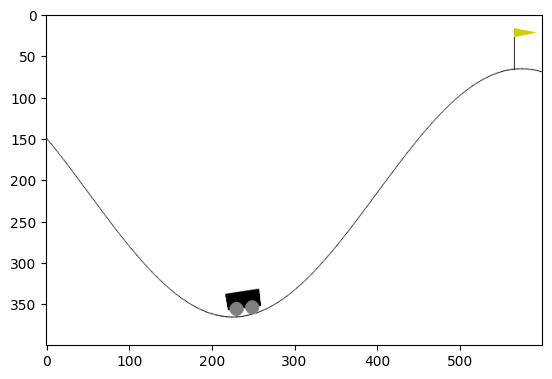

In [11]:
import matplotlib.pyplot as plt

plt.imshow(env.render())
plt.show()

State space and action space of the environment:

In [12]:
print(f"State space: {env.observation_space}")
print(f"Action space: {env.action_space}")

State space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action space: Discrete(3)


The state space is `Box(2,)` which represents the position ($[-0.07, 0.07]$) and velocity $[-1.2, 0.6]$ of the car. In other words, the state space is continuous. In the original paper, the state feature vector $\mathbf{x}_\mathbf{s}$ is constructed according to the tile-coding technique, but we use $\mathbf{x}_\mathbf{s} = \mathbf{s}$ for simplicity.

Finally, close the environment:

In [13]:
env.close()

Now, we will train Off-PAC. We will use [PyTorch](https://pytorch.org/) because of calculating gradients. First, we will implement the behavior policy $\pi_\beta$ and the target policy $\pi_\theta$. The behavior policy is uniform random policy according to the original paper:

In [14]:
import torch
from torch.distributions import Categorical

class BehaviorPolicy:
    """Uniform random policy."""
    def __init__(self, n_actions: int) -> None:
        self.n_actions = n_actions
    
    def policy_dist(self, state: torch.Tensor) -> Categorical:
        # the policy distribution is independent of the state
        return Categorical(probs=torch.ones(self.n_actions) / self.n_actions)

The target policy is parameterized by $\theta$:

In [15]:
class TargetPolicy:
    """`theta` is a parameter of the policy. The shape is `(n_state_features, n_actions)`."""
    def __init__(self, n_state_features: int, n_actions: int) -> None:   
        self.theta = torch.randn((n_state_features, n_actions), requires_grad=True)
        
    def policy_dist(self, state: torch.Tensor) -> Categorical:
        logits = self.theta.T @ state # (n_actions, 1)
        return Categorical(logits=logits.squeeze(dim=-1))

The `state` is 2D tensor `(n_state_features, 1)`.

Now it's time to train the agent. Initialize:

In [16]:
env = gym.make(env_id, max_episode_steps=5000)

n_state_features = env.observation_space.shape[0]
n_actions = env.action_space.n

e_v = torch.zeros((n_state_features, 1))
e_theta = torch.zeros((n_state_features, n_actions))
w = torch.zeros((n_state_features, 1))

v = torch.randn((n_state_features, 1))

b = BehaviorPolicy(n_actions) # pi_beta
pi = TargetPolicy(n_state_features, n_actions) # pi_theta

gamma = 0.99
lam = 0.3
alpha_v = 0.005
alpha_w = 0.001
alpha_theta = 0.001

episodes = 100
# since target policy is updated from the data generated by the behavior policy,
# we evaluate the target policy separately
inference_freq = 1
inference_episodes = []
inference_cumulative_rewards = []

In [17]:
def inference(env: gym.Env, pi: TargetPolicy, episodes: int = 1) -> list[float]:
    cumulative_rewards = []
    
    for _ in range(episodes):
        state, _ = env.reset()
        state = torch.from_numpy(state).unsqueeze(dim=-1) # (n_state_features, 1)
        terminated = False
        cumulative_reward = 0.0
        
        while not terminated:
            # take action and observe
            with torch.no_grad():
                action = pi.policy_dist(state).sample()
            next_state, reward, terminated, truncated, _ = env.step(action.item())
            next_state = torch.from_numpy(next_state).unsqueeze(dim=-1)
            
            cumulative_reward += reward
            terminated = terminated or truncated
            state = next_state
            
        cumulative_rewards.append(cumulative_reward)
        
    return cumulative_rewards

Start training:

In [18]:
from tqdm.notebook import tqdm
import numpy as np

for episode in tqdm(range(1, episodes + 1)):
    state, _ = env.reset()
    state = torch.from_numpy(state).unsqueeze(dim=-1) # (n_state_features, 1)
    terminated = False
    
    while not terminated:
        # take action and observe
        behavior_policy_dist = b.policy_dist(state)
        action = behavior_policy_dist.sample()
        next_state, reward, terminated, truncated, _ = env.step(action.item())
        next_state = torch.from_numpy(next_state).unsqueeze(dim=-1) # (n_state_features, 1)
        
        delta = reward + gamma * v.T @ next_state - v.T @ state
        target_policy_dist = pi.policy_dist(state)
        log_pi_theta = target_policy_dist.log_prob(action)
        rho = torch.exp(log_pi_theta.detach() - behavior_policy_dist.log_prob(action))
        
        # update the critic
        e_v = rho * (state + gamma * lam * e_v)
        v += alpha_v * (delta * e_v - gamma * (1 - lam) * (w.T @ e_v) * state)
        w += alpha_w * (delta * e_v - (w.T @ state) * state)
        
        # update the actor
        log_pi_theta.backward()
        grad_log_pi_theta = pi.theta.grad.detach()
        e_theta = rho * (grad_log_pi_theta + gamma * lam * e_theta)
        pi.theta = pi.theta.detach() + alpha_theta * delta * e_theta
        pi.theta.requires_grad = True
        
        state = next_state
        terminated = terminated or truncated
        
    if episode % inference_freq == 0:
        cumulative_reward = inference(env, pi)[0]
        inference_episodes.append(episode)
        inference_cumulative_rewards.append(cumulative_reward)
        
env.close()

  0%|          | 0/100 [00:00<?, ?it/s]

Plot cumulative rewards:

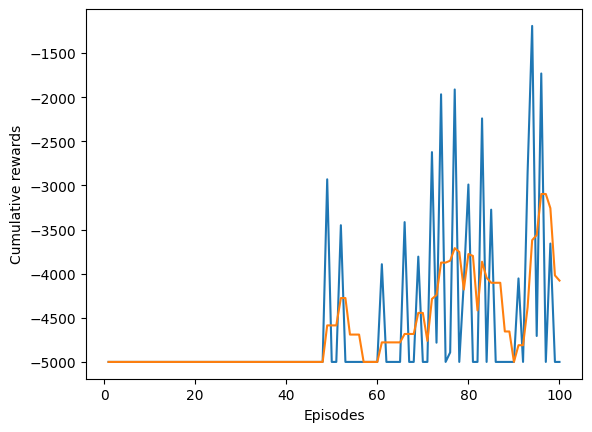

In [19]:
from src.util import moving_average

plt.plot(inference_episodes, inference_cumulative_rewards)
plt.plot(inference_episodes, moving_average(np.array(inference_cumulative_rewards), smooth=0.05))
plt.xlabel("Episodes")
plt.ylabel("Cumulative rewards")
plt.show()

The performance seems not good. It's because the state feature vector is $\mathbf{x}_\mathbf{s} = \mathbf{s}$. Nevertheless, we can see the performance is increasing according to episodes.

### 1.3.5 Challenges

Off-policy methods could be used as an offline RL in principle since they learn a policy from a dataset collected from a different policy. However, there are several challenges to apply off-policy methods to the offline RL setting:

1. Importance sampling suffers from high variance.
2. It's hard to stably learn the value function without additional corrections.

Though approximate off-policy policy gradient can address the first challenge, the fundamental issue still remains: when the behavior policy $\pi_\beta$ is too different from the target policy $\pi_\theta$, the importance weights will become degenerate, then it leads to high variance. So, it's suitable in the case where the policy only deviates by a limited amount from the behavior policy.

## 1.4. Summary

In this chapter, we've addressed what is offline RL and off-policy methods. Summaries of this chapter are as follows:

* Reinforcement learning (RL) learns a policy from interaction with an environment to maximize the cumulative rewards.
* Offline RL learns a policy from a fixed dataset of trajectories collected from a fixed policy.
* Off-policy methods learn a policy from a dataset collected from a different policy, but still require interaction with the environment to collect data.
* Off-policy Monte Carlo uses importance sampling to estimate the expected return under the target policy $\pi$ using samples from the behavior policy $\pi_\beta$.
* Policy gradient is to optimize the RL objective by directly estimating its gradient with respect to the policy parameter $\theta$.
* Approximate off-policy policy gradient can remove the importance sampling, it leads to lower variance.
* There are several challenges to apply off-policy methods to the offline RL setting.

## 1.5. References

[1] Levine, Sergey, et al. "[Offline reinforcement learning: Tutorial, review, and perspectives on open problems.](https://arxiv.org/abs/2005.01643)" arXiv preprint arXiv:2005.01643 (2020).  
[2] Sutton, Richard S., and Andrew G. Barto. Reinforcement learning: An introduction. MIT press, 2018.  
[3] Degris, Thomas, Martha White, and Richard S. Sutton. "[Off-policy actor-critic.](https://arxiv.org/abs/1205.4839)" arXiv preprint arXiv:1205.4839 (2012).